### Trabalho de SAD  
### Aluno: Diego Loza Reis da Silva        matrícula: 0050008653   
### Professor: Alex Salgado
* Preencha sua resposta no próprio arquivo do Jupyter e depois me envie no link que vou colocar no basecamp.

# Tarefa simples de Classificação

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/03_getting_started_with_iris.ipynb

1 - importar os modulos python para machine learn e carregar o arquivo fruit_data_with_colors2.xlsx usando o método read_excel do pandas

In [4]:
import pandas as pd
df = pd.read_excel('fruit_data_with_colors2.xlsx')

2 - Exibir os primeiros registros desta tabela

In [5]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Machine learning terminology
Each row is an observation (also known as: sample, example, instance, record)
Each column is a feature (also known as: predictor, attribute, independent variable, input, regressor, covariate)

3.1 - Quantas observações têm nessa base de dados?  
3.2 - Quantas "features" têm nessa base de dados?

In [7]:
df.shape

(59, 7)

Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)
Classification is supervised learning in which the response is categorical
Regression is supervised learning in which the response is ordered and continuous

4.1 - Quantas respostas temos nessa base?  
4.2 - Para fazer nossas previsões em cima desta base, devemos usar algoritmo de Classificação ou Regressão?  

In [ ]:
59 respostas nesta base. Algoritmo de Classificação.

# store feature matrix in "X"
X = ???

# store response vector in "y"
y = ???

5 - Como você pode gerar a matriz X de feature e o vetor y de respostas? Dica: use essas 3 features para X ['mass', 'width', 'height'] e a resposta deve ser ['fruit_label'].

In [8]:
x = df[['mass', 'width', 'height']]
y = df['fruit_label']

## Training a machine learning model with scikit-learn


K-nearest neighbors (KNN) classification  
6.1 - Usando o algoritmo de KNN (com 1 vizinho, k=1), qual a previsão? Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20,	width=4.3,	height=5.5).


Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/04_model_training.ipynb



In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x,y)
KNN.predict([[20,4.3,5.5]])

array([2], dtype=int64)

Agora faça a mesma previsão, usando os seguintes algoritmos: 
6.2 - KNN(k=5)  


In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x,y)
KNN.predict([[20,4.3,5.5]])

array([2], dtype=int64)

e 6.3 - LogisticRegression  


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
logreg.predict([[20,4.3,5.5]])



array([2], dtype=int64)

## Evaluation procedure #1: Train and test on the entire dataset
7 - Usando o método de avaliação de acurácia (Treinar e testar na base de dados inteira), qual dos 3 métodos do item 6 é mais eficiente?

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb


7.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [15]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))



1.0


7.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.779661016949


7.3 - Acurácia usando o algoritmo de LogisticRegression


In [28]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x, y)

# predict the response values for the observations in X
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))


0.745762711864


In [29]:
# O Número 1 é o mais eficiente.

## Evaluation procedure #2: Train/test split
Usando o método de avaliação de acurácia (Treinar e testar SEPARADAMENTE), qual dos 3 métodos do item 6 é mais eficiente?
Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

8.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

(35, 3)
(24, 3)
0.541666666667


8.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.333333333333


8.3 - Acurácia usando o algoritmo de LogisticRegression

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.583333333333


In [30]:
# O mais eficiente é o terceiro.

## Can we locate an even better value for K?
Faça um programa python para testar diferentes valores de K entre 1 e 25 e diga através de gráfico, qual foi o melhor valor de K que obteve a melhor performance?


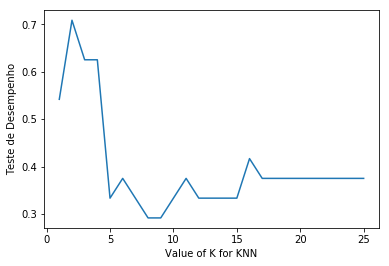

In [26]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Teste de Desempenho')

Utilizando este seu último ajuste de K, faça novamente a seguinte previsão. Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20, width=4.3, height=5.5

In [27]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x,y)
KNN.predict([[20,4.3,5.5]])

array([2], dtype=int64)